# Compare station observation and model result profiles


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
import pandas as pd 
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl
import pandas as pd
import warnings
import pickle
warnings.filterwarnings('ignore')

%matplotlib notebook

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


#### Load GEOTRACES data

In [2]:
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')

In [3]:
dPb_BB1 = Pb_data['BB1'][np.isfinite(Pb_data['BB1'])].astype('float')
dPb_BB2 = Pb_data['BB2'][np.isfinite(Pb_data['BB2'])].astype('float')
dPb_BB3 = Pb_data['BB3'][np.isfinite(Pb_data['BB3'])].astype('float')
dPb_CB1 = Pb_data['CB1'][np.isfinite(Pb_data['CB1'])].astype('float')
dPb_CB2 = Pb_data['CB2'][np.isfinite(Pb_data['CB2'])].astype('float')
dPb_CB3 = Pb_data['CB3'][np.isfinite(Pb_data['CB3'])].astype('float')
dPb_CB4 = Pb_data['CB4'][np.isfinite(Pb_data['CB4'])].astype('float')
dPb_CAA1 = Pb_data['CAA1'][np.isfinite(Pb_data['CAA1'])].astype('float')
dPb_CAA2 = Pb_data['CAA2'][np.isfinite(Pb_data['CAA2'])].astype('float')
dPb_CAA3 = Pb_data['CAA3'][np.isfinite(Pb_data['CAA3'])].astype('float')
dPb_CAA4 = Pb_data['CAA4'][np.isfinite(Pb_data['CAA4'])].astype('float')
dPb_CAA5 = Pb_data['CAA5'][np.isfinite(Pb_data['CAA5'])].astype('float')
dPb_CAA6 = Pb_data['CAA6'][np.isfinite(Pb_data['CAA6'])].astype('float')
dPb_CAA7 = Pb_data['CAA7'][np.isfinite(Pb_data['CAA7'])].astype('float')
dPb_CAA8 = Pb_data['CAA8'][np.isfinite(Pb_data['CAA8'])].astype('float')
dPb_CAA9 = Pb_data['CAA9'][np.isfinite(Pb_data['CAA9'])].astype('float')

In [4]:
depth_BB1 = Pb_data['Depth.1'][np.isfinite(Pb_data['BB1'])].astype('float')
depth_BB2 = Pb_data['Depth.2'][np.isfinite(Pb_data['BB2'])].astype('float')
depth_BB3 = Pb_data['Depth.3'][np.isfinite(Pb_data['BB3'])].astype('float')
depth_CB1 = Pb_data['Depth.13'][np.isfinite(Pb_data['CB1'])].astype('float')
depth_CB2 = Pb_data['Depth.14'][np.isfinite(Pb_data['CB2'])].astype('float')
depth_CB3 = Pb_data['Depth.15'][np.isfinite(Pb_data['CB3'])].astype('float')
depth_CB4 = Pb_data['Depth.16'][np.isfinite(Pb_data['CB4'])].astype('float')
depth_CAA1 = Pb_data['Depth.4'][np.isfinite(Pb_data['CAA1'])].astype('float')
depth_CAA2 = Pb_data['Depth.5'][np.isfinite(Pb_data['CAA2'])].astype('float')
depth_CAA3 = Pb_data['Depth.6'][np.isfinite(Pb_data['CAA3'])].astype('float')
depth_CAA4 = Pb_data['Depth.7'][np.isfinite(Pb_data['CAA4'])].astype('float')
depth_CAA5 = Pb_data['Depth.8'][np.isfinite(Pb_data['CAA5'])].astype('float')
depth_CAA6 = Pb_data['Depth.9'][np.isfinite(Pb_data['CAA6'])].astype('float')
depth_CAA7 = Pb_data['Depth.10'][np.isfinite(Pb_data['CAA7'])].astype('float')
depth_CAA8 = Pb_data['Depth.11'][np.isfinite(Pb_data['CAA8'])].astype('float')
depth_CAA9 = Pb_data['Depth.12'][np.isfinite(Pb_data['CAA9'])].astype('float')

In [5]:
stn_names = Pb_data['Station names'].astype('str')
lons = Pb_data['station lon'].astype('float').dropna()
lats = Pb_data['Station lat'].astype('float').dropna()

In [6]:
def station_profile(ax, dPb, stn_depths, c='g'):
    ax.invert_yaxis()
      
    # observations:
    dPb_obs   = np.array(dPb)
    depth_obs = np.array(stn_depths)
    ax.plot(dPb_obs*1000, depth_obs, zorder=3, linestyle='-', linewidth=2.5, color=c)
    ax.scatter(dPb_obs*1000, depth_obs, zorder=4, edgecolors='k', color=c)
    ax.set_ylim([500, -20])
    ax.set_xlim([0,17])
    ax.set_xticks([0, 5, 10, 15])
    
    return ax

In [7]:
color_stn = ['#00cdcd', '#5da4ba', '#ffa700', '#cd3333']

<IPython.core.display.Javascript object>


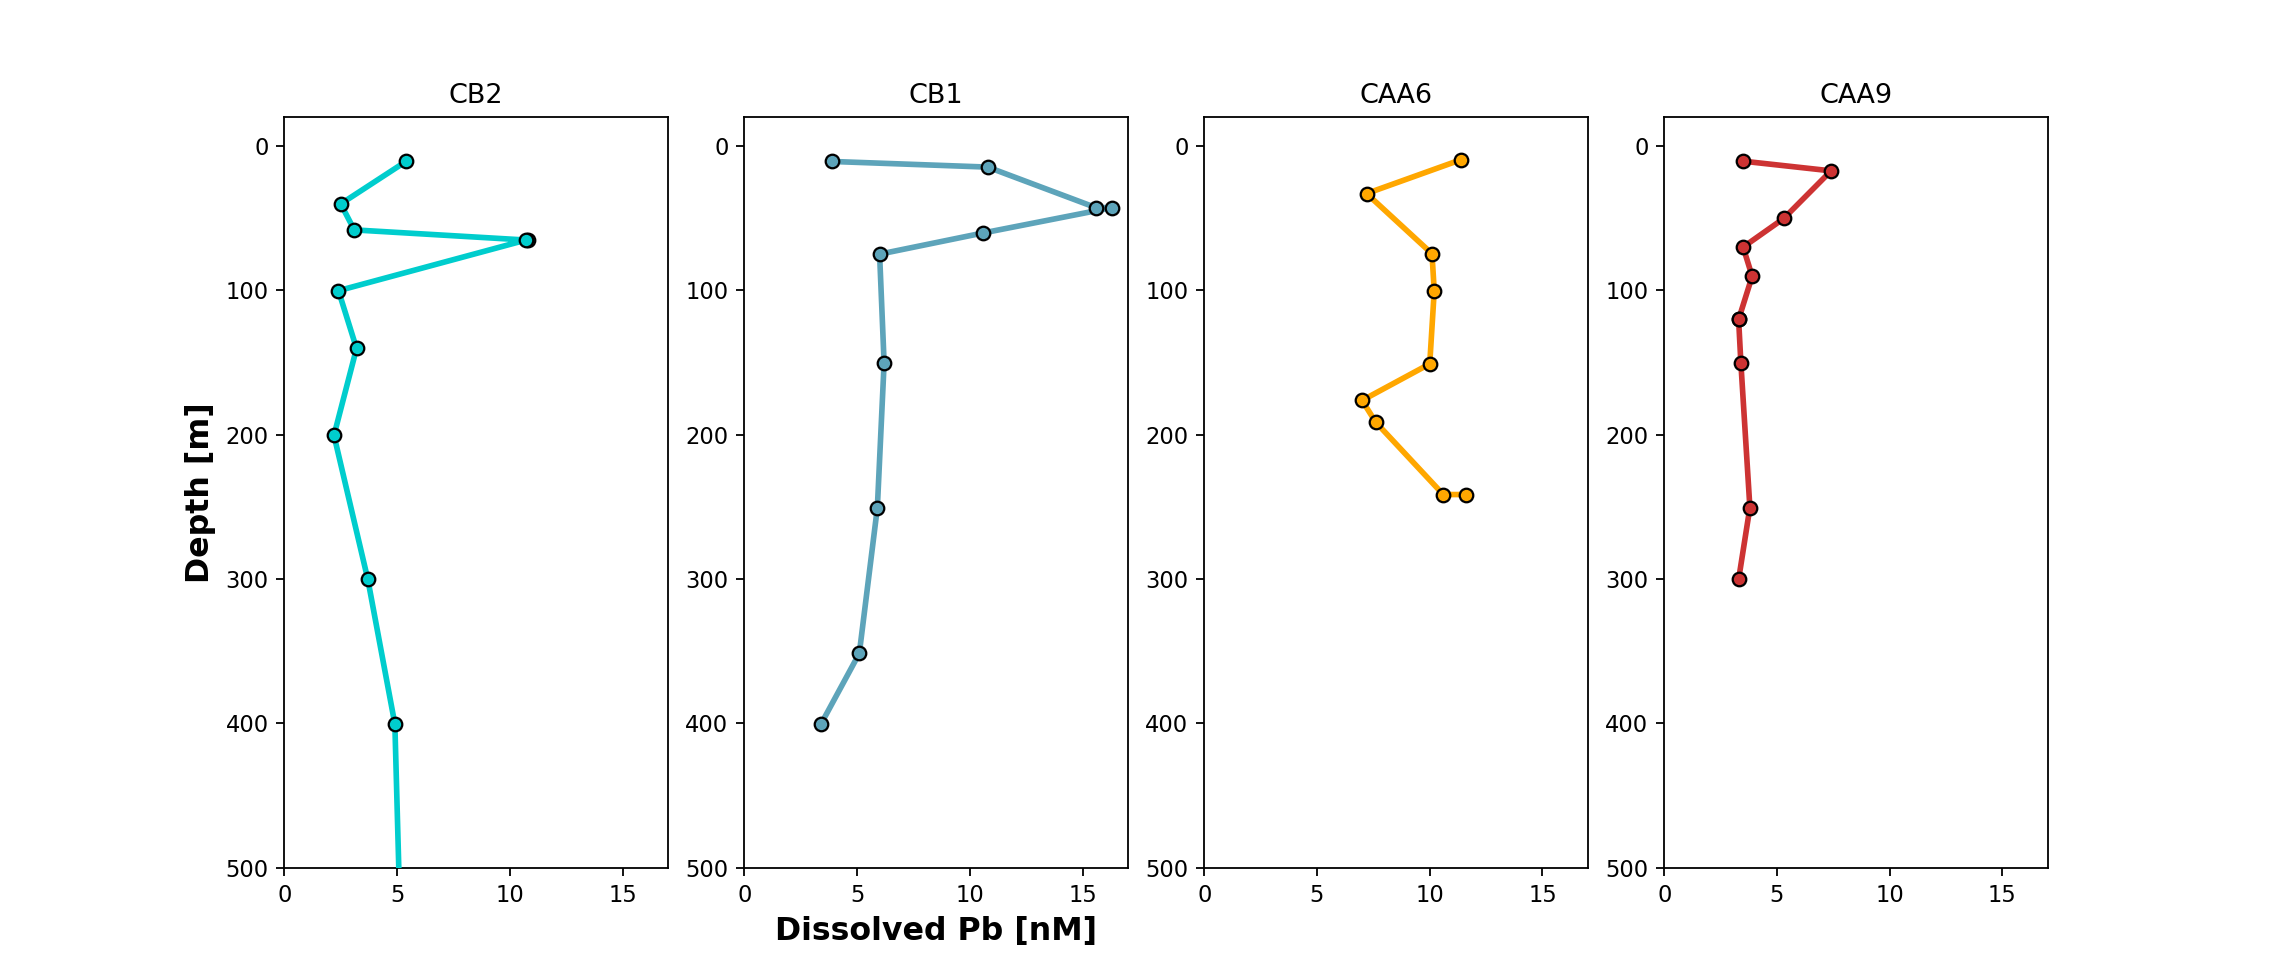

In [90]:
fig, ax = plt.subplots(1,4, figsize=(14, 6))

station_profile(ax[0], dPb_CB2, depth_CB2, c=color_stn[0])
station_profile(ax[1], dPb_CB1, depth_CB1, c=color_stn[1])
station_profile(ax[2], dPb_CAA6, depth_CAA6, c=color_stn[2])
station_profile(ax[3], dPb_CAA9, depth_CAA9, c=color_stn[3])

ax[0].set_ylabel('Depth [m]', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Dissolved Pb [nM]', fontsize=14, fontweight='bold')
ax[0].set_title('CB2')
ax[1].set_title('CB1')
ax[2].set_title('CAA6')
ax[3].set_title('CAA9')
fig.savefig('/ocean/brogalla/GEOTRACES/figures/mixing_profiles.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


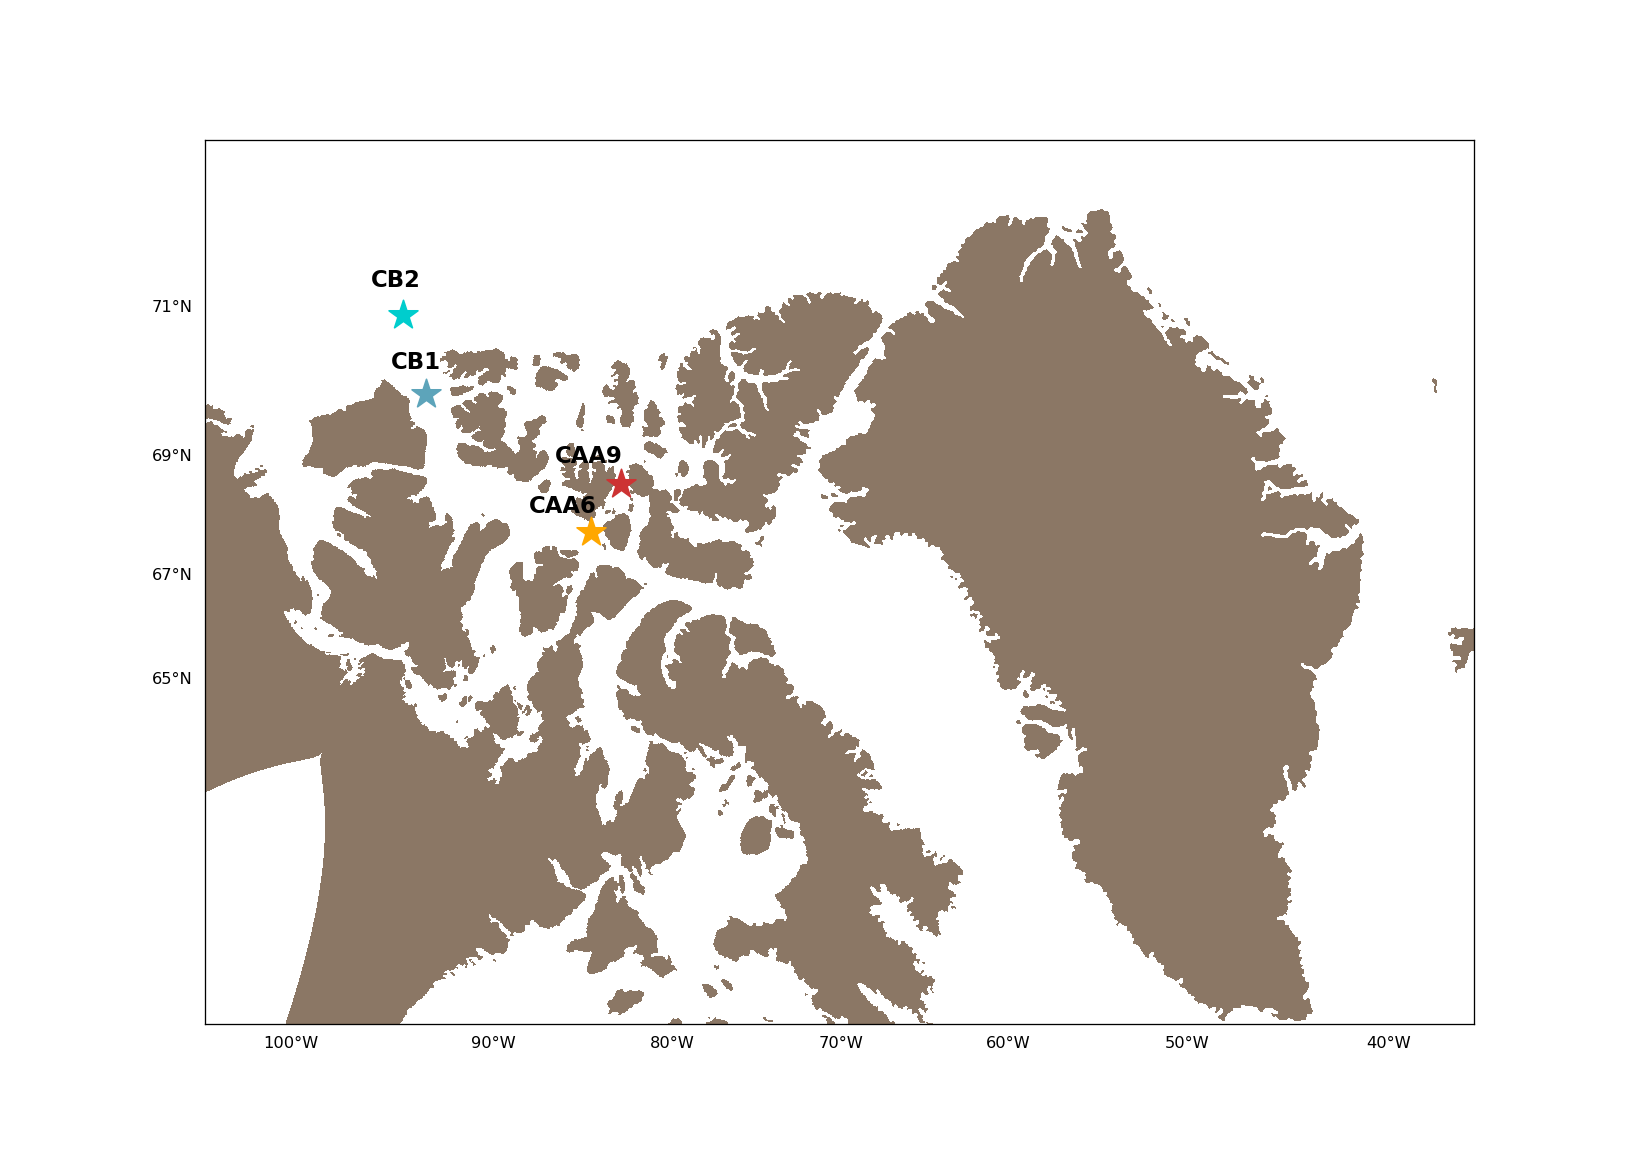

In [11]:
proj = pickle.load(open('../../particle_tracking/Barrow_Strait/surface-land_mask.pickle','rb'))

i=0
for name in ['CB2', 'CB1', 'CAA6', 'CAA9']:
    for stn in stn_names:
        if stn==name:
            x_GEOTRACES, y_GEOTRACES = proj(np.array(lons[stn_names==name]), np.array(lats[stn_names==name]))
            proj.scatter(x_GEOTRACES, y_GEOTRACES, marker='*', s=350, c=color_stn[i])
            plt.text(x_GEOTRACES*0.84, y_GEOTRACES*1.04, name, fontsize=14, fontweight='bold')        
    i+=1
    
plt.savefig('/ocean/brogalla/GEOTRACES/figures/stn_map.png', bbox_inches='tight')

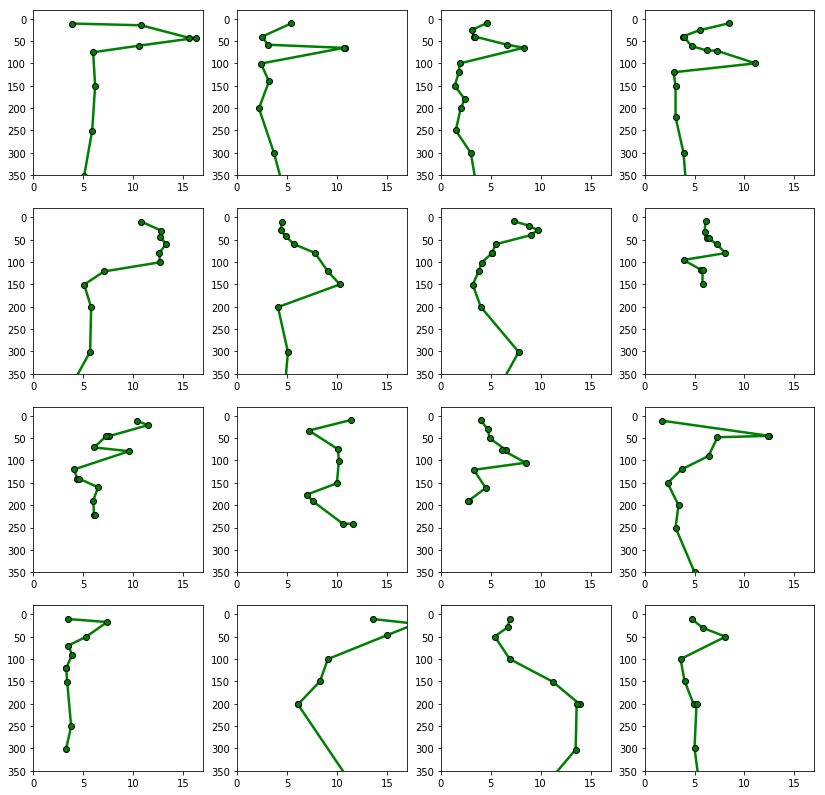

In [36]:
fig, ax = plt.subplots(4,4, figsize=(14,14))
station_profile(ax[0,0], dPb_CB1, depth_CB1, 'CB1')
station_profile(ax[0,1], dPb_CB2, depth_CB2, 'CB2')
station_profile(ax[0,2], dPb_CB3, depth_CB3, 'CB3')
station_profile(ax[0,3], dPb_CB4, depth_CB4, 'CB4')
station_profile(ax[1,0], dPb_CAA1, depth_CAA1, 'CAA1')
station_profile(ax[1,1], dPb_CAA2, depth_CAA2, 'CAA2')
station_profile(ax[1,2], dPb_CAA3, depth_CAA3, 'CAA3')
station_profile(ax[1,3], dPb_CAA4, depth_CAA4, 'CAA4')
station_profile(ax[2,0], dPb_CAA5, depth_CAA5, 'CAA5')
station_profile(ax[2,1], dPb_CAA6, depth_CAA6, 'CAA6')
station_profile(ax[2,2], dPb_CAA7, depth_CAA7, 'CAA7')
station_profile(ax[2,3], dPb_CAA8, depth_CAA8, 'CAA8')
station_profile(ax[3,0], dPb_CAA9, depth_CAA9, 'CAA9')
station_profile(ax[3,1], dPb_BB1, depth_BB1, 'BB1')
station_profile(ax[3,2], dPb_BB2, depth_BB2, 'BB1')
station_profile(ax[3,3], dPb_BB3, depth_BB3, 'BB1')

<IPython.core.display.Javascript object>


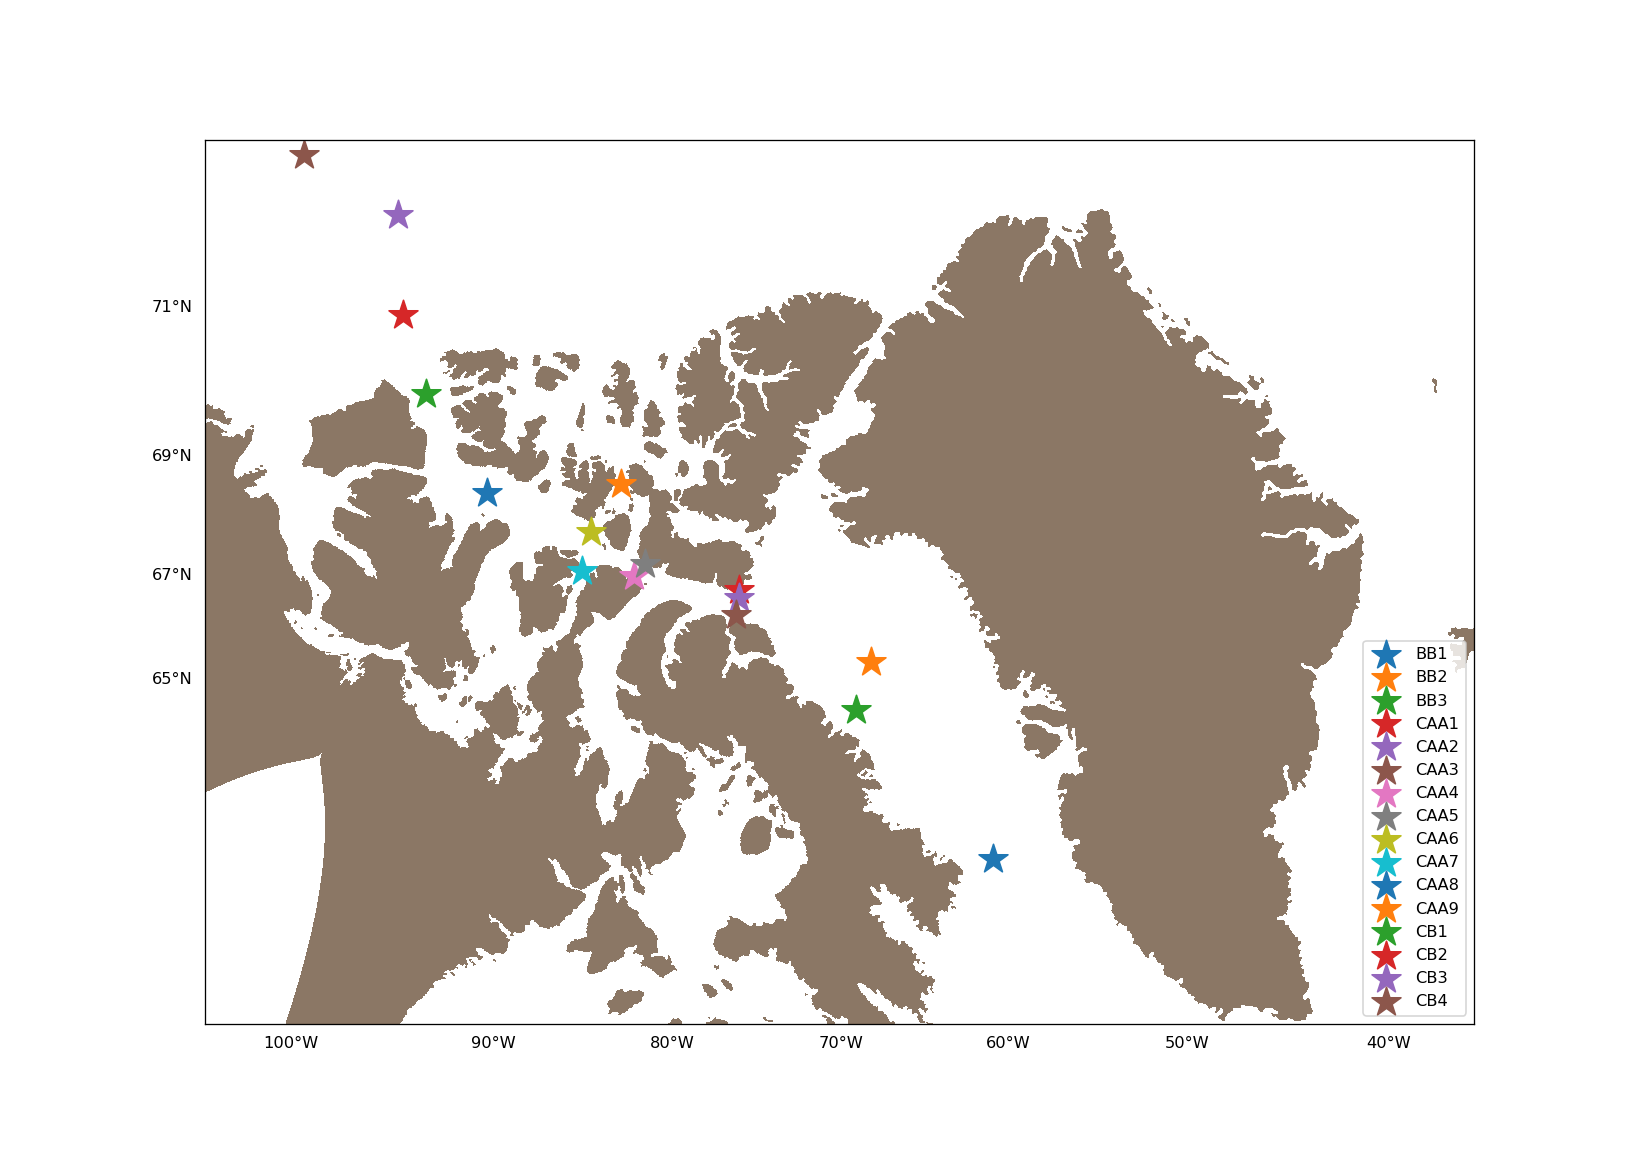

In [21]:
proj = pickle.load(open('../../particle_tracking/Barrow_Strait/surface-land_mask.pickle','rb'))
#plt.annotate('Dissolved Pb [pM]', xy=(1000, 0.78), ha='center', fontsize=14,fontweight='bold')
#plt.annotate('Depth [m]', xy=(0.08, 1000), va='center', rotation='vertical', fontsize=14, fontweight='bold')

# # profile plots:
# ax1 = plt.axes([0.78, 0.41, 0.07, 0.15]) #CAA1
# ax2 = plt.axes([0.78, 0.22, 0.07, 0.15])
# ax3 = plt.axes([0.56, 0.22, 0.07, 0.15])
# ax4 = plt.axes([0.56, 0.60, 0.07, 0.15])
# ax5 = plt.axes([0.68, 0.60, 0.07, 0.15])
# ax6 = plt.axes([0.44, 0.22, 0.07, 0.15]) #
# ax7 = plt.axes([0.32, 0.22, 0.07, 0.15])
# ax8 = plt.axes([0.18, 0.22, 0.07, 0.15])
# ax9 = plt.axes([0.44, 0.60, 0.07, 0.15])
# ax10 = plt.axes([0.32, 0.60, 0.07, 0.15]) #CB1
# ax11 = plt.axes([0.18, 0.41, 0.07, 0.15])
# ax12 = plt.axes([0.18, 0.60, 0.07, 0.15])

# axes_list=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

# for axi in axes_list:
#     axi.tick_params(labelsize=12)
    
# fig1 = station_profile(fig2, ax1, dMn_CAA1, depth_CAA1, CAA1, 'CAA1', month)
# fig2 = station_profile(fig2, ax2, dMn_CAA2, depth_CAA2, CAA2, 'CAA2', month)
# fig3 = station_profile(fig2, ax3, dMn_CAA3, depth_CAA3, CAA3, 'CAA3', month)
# fig4 = station_profile(fig2, ax4, dMn_CAA4, depth_CAA4, CAA4, 'CAA4', month)
# fig5 = station_profile(fig2, ax5, dMn_CAA5, depth_CAA5, CAA5, 'CAA5', month)
# fig6 = station_profile(fig2, ax6, dMn_CAA6, depth_CAA6, CAA6, 'CAA6', month)
# fig7 = station_profile(fig2, ax7, dMn_CAA7, depth_CAA7, CAA7, 'CAA7', month)
# fig8 = station_profile(fig2, ax8, dMn_CAA8, depth_CAA8, CAA8, 'CAA8', month)
# fig9 = station_profile(fig2, ax9, dMn_CAA9, depth_CAA9, CAA9, 'CAA9', month)
# fig10 = station_profile(fig2, ax10, dMn_CB1, depth_CB1, CB1, 'CB1', month)
# fig11 = station_profile(fig2, ax11, dMn_CB2, depth_CB2, CB2, 'CB2', month)
# fig12 = station_profile(fig2, ax12, dMn_CB3, depth_CB3, CB3, 'CB3', month)

x_GEOTRACES, y_GEOTRACES = proj(np.array(lons), np.array(lats))
# proj.scatter(x_GEOTRACES, y_GEOTRACES, marker='*',s=350,zorder=5, edgecolor='k')
for i in range(2,len(lons)):
    proj.scatter(x_GEOTRACES[i], y_GEOTRACES[i], marker='*', s=350, label=stn_names[i])
    
plt.legend()

# create lines connecting the profiles:
# coordsA = "data"
# coordsB = "data"
# for i in range(len(names[0:12])):
#     xy1 = (x_GEOTRACES[i], y_GEOTRACES[i])
#     xy2 = (15, bottom_depths[i]/2)
#     axB = axes_list[i]
#     con = ConnectionPatch(xyA=xy1, xyB=xy2, axesA=ax, axesB=axB, \
#                           coordsA=coordsA, coordsB=coordsB, arrowstyle="-", linewidth=2, zorder=2)
#     ax.add_artist(con)

# fig2.savefig('/ocean/brogalla/GEOTRACES/figures/Mn_profile_evaluation-20190417.png', bbox_inches='tight')

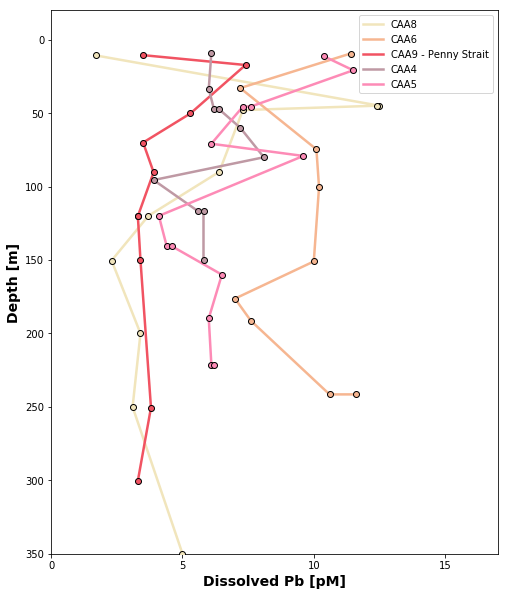

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8, 10))
# station_profile(ax, dPb_CB4, depth_CB4, 'CB4',    c='#587081')
# station_profile(ax, dPb_CB3, depth_CB3, 'CB3',    c='#00a5ac')
# station_profile(ax, dPb_CB2, depth_CB2, 'CB2',    c='#cfff00')
# station_profile(ax, dPb_CB1, depth_CB1, 'CB1',    c='#e8612c')
station_profile(ax, dPb_CAA8, depth_CAA8, 'CAA8', c='#f1e5bc')
station_profile(ax, dPb_CAA6, depth_CAA6, 'CAA6', c='#f6b691')
station_profile(ax, dPb_CAA9, depth_CAA9, 'CAA9 - Penny Strait', c='#f15362')
station_profile(ax, dPb_CAA4, depth_CAA4, 'CAA4', c='#bf99a4')
station_profile(ax, dPb_CAA5, depth_CAA5, 'CAA5', c='#fd8bb6')
ax.set_ylabel('Depth [m]', fontsize=14, fontweight='bold')
ax.set_xlabel('Dissolved Pb [pM]', fontsize=14, fontweight='bold')
ax.legend()
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/Pb_mixing_profiles.png', bbox_inches='tight')